In [170]:
import requests
import pandas as pd
import seaborn as sns

In [171]:
df = pd.read_csv('apple_all_data.csv')

In [172]:
df.head(3)

,open,high,low,last,close,volume,date,symbol,exchange
0,191.510,191.510,191.510,NaN,191.51,NaN,2018-06-09T00:00:00+0000,AAPL,IEXG
1,191.390,191.995,191.385,NaN,191.51,NaN,2018-06-08T23:00:00+0000,AAPL,IEXG
2,191.135,191.535,191.130,NaN,191.38,NaN,2018-06-08T22:00:00+0000,AAPL,IEXG


In [173]:
df.nunique()

open         6363
high         6893
low          6930
last         4421
close        3095
volume       5276
date        11923
symbol          1
exchange        1
dtype: int64

In [174]:
df = df.drop_duplicates()

 **Setting date as index to the dataframe**

In [175]:
df = df.set_index('date')

In [176]:
df.index = pd.to_datetime(df.index)

In [177]:
df.head(3)

,open,high,low,last,close,volume,symbol,exchange
date,,,,,,,,
2018-06-09 00:00:00+00:00,191.510,191.510,191.510,NaN,191.51,NaN,AAPL,IEXG
2018-06-08 23:00:00+00:00,191.390,191.995,191.385,NaN,191.51,NaN,AAPL,IEXG
2018-06-08 22:00:00+00:00,191.135,191.535,191.130,NaN,191.38,NaN,AAPL,IEXG


In [178]:
df.isna().sum()

open           0
high           0
low            0
last        6564
close       2840
volume      6564
symbol         0
exchange       0
dtype: int64

In [179]:
df[df['last'] != df['last']]

,open,high,low,last,close,volume,symbol,exchange
date,,,,,,,,
2018-06-09 00:00:00+00:00,191.510,191.510,191.510,NaN,191.51,NaN,AAPL,IEXG
2018-06-08 23:00:00+00:00,191.390,191.995,191.385,NaN,191.51,NaN,AAPL,IEXG
2018-06-08 22:00:00+00:00,191.135,191.535,191.130,NaN,191.38,NaN,AAPL,IEXG
2018-06-08 21:00:00+00:00,191.080,191.405,190.895,NaN,191.14,NaN,AAPL,IEXG
2018-06-08 20:00:00+00:00,190.535,191.995,190.535,NaN,191.51,NaN,AAPL,IEXG
...,...,...,...,...,...,...,...,...
2023-09-11 19:00:00+00:00,179.670,179.695,179.645,NaN,NaN,NaN,AAPL,IEXG
2023-09-11 18:00:00+00:00,179.250,179.370,179.250,NaN,NaN,NaN,AAPL,IEXG
2023-09-12 14:00:00+00:00,178.725,178.740,178.370,NaN,NaN,NaN,AAPL,IEXG


In [180]:
df.to_csv('hourwise_data_preprocessed_appl.csv',index= True)


# Null value treatment
*   can be filled with forward value or backward value fillna(method='ffill') .fillna(method='bfill')
  **Check Auto correlation plots to use these methods**
*   can be filled in using mean/median/mode/etc,. of the window periods



<Axes: xlabel='date'>

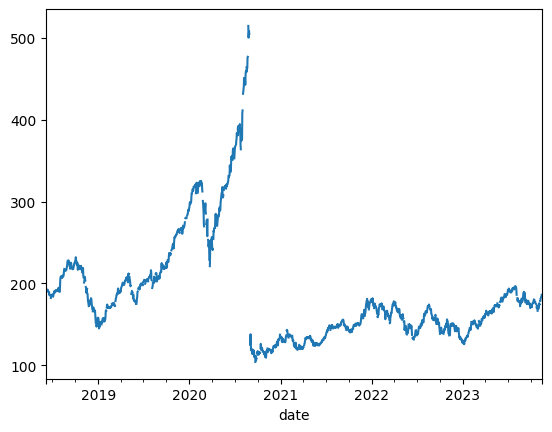

In [159]:
df['open'].resample('D').mean().plot()

In [160]:
import plotly.express as px
fig = px.line(df, x=df.index, y=df['volume'], title='Values')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

**Resampling the hour wise data into day wise with mean values.**

In [161]:
df1 = pd.DataFrame()

In [162]:
df1['open']= df['open'].resample('D').mean()

In [163]:
df1['day'] = df1.index.day_name()

In [164]:
df1.tail(15)

,open,day
date,,
2023-10-31 00:00:00+00:00,169.600000,Tuesday
2023-11-01 00:00:00+00:00,169.670000,Wednesday
2023-11-02 00:00:00+00:00,175.670000,Thursday
2023-11-03 00:00:00+00:00,173.750000,Friday
2023-11-04 00:00:00+00:00,174.240000,Saturday
2023-11-05 00:00:00+00:00,NaN,Sunday
2023-11-06 00:00:00+00:00,178.430000,Monday
2023-11-07 00:00:00+00:00,178.514286,Tuesday
2023-11-08 00:00:00+00:00,181.520000,Wednesday


**Since the null values are on weekends we can simply impute with previous values**

In [165]:
df1['open'] = df1['open'].fillna(method='bfill')

In [166]:
fig = px.line(df1, x=df1.index, y=df1['open'], title='Daily Average Open Values')

fig.update_xaxes(
    rangeslider_visible=True
    )
fig.show()


<Axes: xlabel='date'>

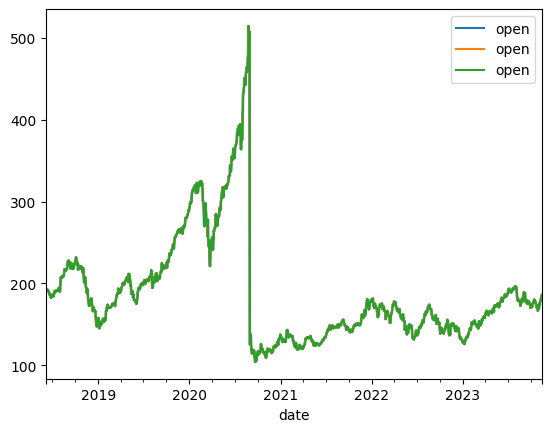

In [167]:
pd.concat([df1['open'],df1['open'].shift(1),df1['open'].shift(2)], axis=1).plot()

<Axes: xlabel='date'>

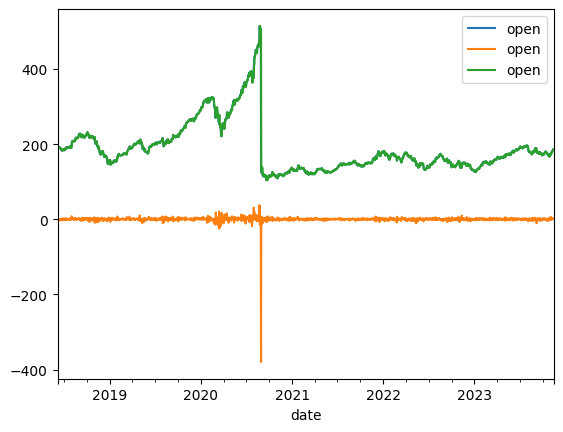

In [168]:
pd.concat([df1['open'],df1['open'].diff(1),df1['open'].shift(1)], axis=1).plot()

**That huge dip in stock price is beacause apple split the stock into 4 on 28 August 2020.**

In [169]:
df1.to_csv('appl_preprocessed_open.csv',index=True)